In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
from datetime import datetime
from datetime import *

In [2]:
# Reading data from csv while parsing date column as datetime and index
mydateparser = lambda x: pd.datetime.strptime(x, "%d-%b-%y")
stockData_df = pd.read_csv('/Users/psai1/spx.csv', infer_datetime_format=True, \
                          parse_dates=['date'], date_parser=mydateparser, index_col ="date")

<ipython-input-2-9622e21e175a>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  mydateparser = lambda x: pd.datetime.strptime(x, "%d-%b-%y")


In [3]:
stockData_df.sample(5)

,close
date,
2004-05-19,1088.68
2013-07-01,1614.96
1992-03-16,406.39
2013-10-10,1692.56
2000-04-14,1356.56


In [4]:
stockData_df.shape

(8192, 1)

In [5]:
# Taking latest complete one year data to ease coding
stockData_2017_df = stockData_df[(stockData_df.index.year == 2017)]

In [6]:
stockData_2017_df.shape
print(stockData_2017_df)

              close
date               
2017-01-03  2257.83
2017-01-04  2270.75
2017-01-05  2269.00
2017-01-06  2276.98
2017-01-09  2268.90
...             ...
2017-12-22  2683.34
2017-12-26  2680.50
2017-12-27  2682.62
2017-12-28  2687.54
2017-12-29  2673.61

[251 rows x 1 columns]


In [7]:
#Check if the date is in dataframe or not
def Get_Valid_Date(given_date,df):
    try:
        giv_date=str(given_date)
        year=giv_date[0:4]
        month=giv_date[5:7]
        day=giv_date[8:10]
        current_date=datetime(int(year),int(month),int(day))
        cur_date=current_date.date()
        condition=given_date in df.index
        if cur_date>date(2017, 12, 29):
            return date(2017, 12, 29)
        elif cur_date<date(2017, 1, 3):
            return date(2017, 1, 3)
        elif condition==True:
            return cur_date
        else:
            reduced_date = current_date - timedelta(days=1)
            return Get_Valid_Date(reduced_date,df)
    except ValueError:
        giv_date=str(given_date)
        year=giv_date[0:4]
        month=giv_date[5:7]
        int_day=int(giv_date[8:10])-1
        day=str(int_day)
        present_date=year+"-"+month+"-"+day
        return Get_Valid_Date(present_date,df)
        
        

In [8]:
checked_date=Get_Valid_Date("2017-03-03",stockData_2017_df)
checked_date 

datetime.date(2017, 3, 3)

In [9]:
# Get closing value for the given date 
def Get_closing_Value(given_date,df):
    result_date=str(Get_Valid_Date(given_date,df))
    day_close=df.loc[result_date,["close"]]
    return day_close

In [10]:
Get_closing_Value("2017-03-03",stockData_2017_df)

close    2383.12
Name: 2017-03-03 00:00:00, dtype: float64

In [11]:
# Calculate percentage growth when given day closing and dataframe
def Cal_per_growth(d_close, df):
    final_close=df.iloc[-1]
    d_close_value=Get_closing_Value(d_close,df)
    return ((final_close-d_close_value)/d_close_value)*100

In [12]:
Cal_per_growth("2017-03-03",stockData_2017_df)

close    12.189483
dtype: float64

In [13]:
# Calculate average growth of a given day of the month in the given dataframe
def Cal_avg_growth(day_of_month, df):
    sum=0
    for i in range(1,10):
        if day_of_month<10:  
            loop_date="2017-0"+str(i)+"-0"+str(day_of_month)
            loop_avg_growth=Cal_per_growth(loop_date,df)
            sum=sum+loop_avg_growth
        else :  
            loop_date="2017-0"+str(i)+"-"+str(day_of_month)
            loop_avg_growth=Cal_per_growth(loop_date,df)
            sum=sum+loop_avg_growth
    for i in range(10,13):
        if day_of_month<10:  
            loop_date="2017-"+str(i)+"-0"+str(day_of_month)
            loop_avg_growth=Cal_per_growth(loop_date,df)
            sum=sum+loop_avg_growth
        else :  
            loop_date="2017-"+str(i)+"-"+str(day_of_month)
            loop_avg_growth=Cal_per_growth(loop_date,df)
            sum=sum+loop_avg_growth
            
    avg_percent_growth_one_day_full_year=sum/12
    return avg_percent_growth_one_day_full_year

In [15]:
Cal_avg_growth(30,stockData_2017_df)

close    8.705487
dtype: float64

In [16]:
def Cal_avg_growth_allDays(df):
    final= pd.DataFrame({'day': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]})
    final.set_index('day')
    result=[]
    for i in range(1,32):
        result.append(Cal_avg_growth(i, df))
    final["Average Growth"]=result
    return final

In [17]:
Result_table=Cal_avg_growth_allDays(stockData_2017_df)
Result_table

,day,Average Growth
0,1,close 9.968917 dtype: float64
1,2,close 9.933011 dtype: float64
2,3,close 9.838061 dtype: float64
3,4,close 9.752149 dtype: float64
4,5,close 9.799334 dtype: float64
5,6,close 9.881239 dtype: float64
6,7,close 9.804748 dtype: float64
7,8,close 9.793305 dtype: float64
8,9,close 9.833718 dtype: float64
9,10,close 9.862929 dtype: float64


In [28]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

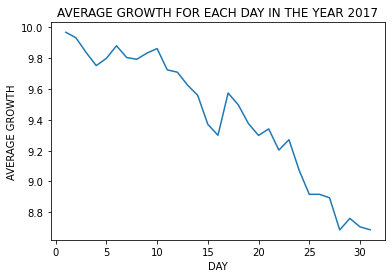

In [31]:
x=Result_table["day"]
y=Result_table["Average Growth"]
plt.plot(x, y)
plt.xlabel('DAY')
plt.ylabel('AVERAGE GROWTH')
plt.title('AVERAGE GROWTH FOR EACH DAY IN THE YEAR 2017')
plt.show()

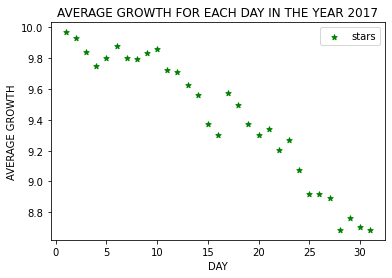

In [33]:
x=Result_table["day"]
y=Result_table["Average Growth"]
plt.scatter(x, y, label= "stars", color= "green", marker= "*", s=31)
plt.xlabel('DAY')
plt.ylabel('AVERAGE GROWTH')
plt.title('AVERAGE GROWTH FOR EACH DAY IN THE YEAR 2017')
plt.legend()
plt.show()

In [17]:
Result_table.to_csv('Stocks_data.csv', header=True, index=False)